## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""


'\nYour code here (optional)\n確認硬體資源\n'

In [2]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = 2*(x / 255.)-1
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)
print(x_train)

[[-0.5372549  -0.51372549 -0.50588235 ... -0.03529412 -0.27843137
  -0.43529412]
 [ 0.20784314  0.38823529  0.46666667 ...  0.12156863  0.04313725
   0.12941176]
 [ 1.          1.          1.         ... -0.37254902 -0.3254902
  -0.34117647]
 ...
 [-0.7254902   0.39607843  0.84313725 ... -0.90588235 -0.75686275
  -0.60784314]
 [ 0.48235294  0.65490196  0.88235294 ...  0.52941176  0.49019608
   0.34117647]
 [ 0.79607843  0.79607843  0.8745098  ...  0.27843137  0.27843137
   0.2627451 ]]


In [6]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 32, 16, 8, 4, 2]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
hidd

In [7]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [8]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [9]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 13s 256us/step - loss: 2.1409 - acc: 0.1831 - val_loss: 2.0148 - val_acc: 0.2125
Epoch 2/100
50000/50000 [==============================] - 11s 216us/step - loss: 1.9222 - acc: 0.2499 - val_loss: 1.8428 - val_acc: 0.2918
Epoch 3/100
50000/50000 [==============================] - 11s 211us/step - loss: 1.7775 - acc: 0.3339 - val_loss: 1.7381 - val_acc: 0.3617
Epoch 4/100
50000/50000 [==============================] - 11s 219us/step - loss: 1.6840 - acc: 0.3742 - val_loss: 1.6997 - val_acc: 0.3814
Epoch 5/100
50000/50000 [==============================] - 11s 218us/step - loss: 1.6114 - acc: 0.3965 - val_loss: 1.6720 - val_acc: 0.3896
Epoch 6/100
50000/50000 [==============================] - 11s 222us/step - loss: 1.5480 - acc: 0.4190 - val_loss: 1.6564 - val_acc: 0.4022
Epoch 7/100
50000/50000 [==============================] - 12s

Epoch 57/100
50000/50000 [==============================] - 10s 199us/step - loss: 0.4046 - acc: 0.8705 - val_loss: 3.1655 - val_acc: 0.4925
Epoch 58/100
50000/50000 [==============================] - 10s 198us/step - loss: 0.3109 - acc: 0.9000 - val_loss: 3.5424 - val_acc: 0.4933
Epoch 59/100
50000/50000 [==============================] - 10s 198us/step - loss: 0.2621 - acc: 0.9181 - val_loss: 3.5453 - val_acc: 0.4961
Epoch 60/100
50000/50000 [==============================] - 10s 194us/step - loss: 0.2722 - acc: 0.9143 - val_loss: 3.7704 - val_acc: 0.4929
Epoch 61/100
50000/50000 [==============================] - 10s 198us/step - loss: 0.2723 - acc: 0.9161 - val_loss: 3.6182 - val_acc: 0.4909
Epoch 62/100
50000/50000 [==============================] - 10s 199us/step - loss: 0.2554 - acc: 0.9210 - val_loss: 3.5799 - val_acc: 0.4933
Epoch 63/100
50000/50000 [==============================] - 10s 195us/step - loss: 0.2773 - acc: 0.9143 - val_loss: 3.5391 - val_acc: 0.4940
Epoch 64/100


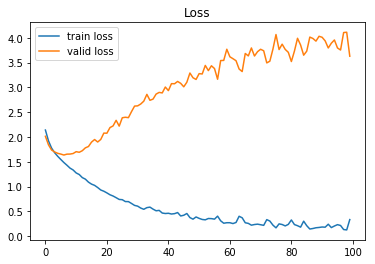

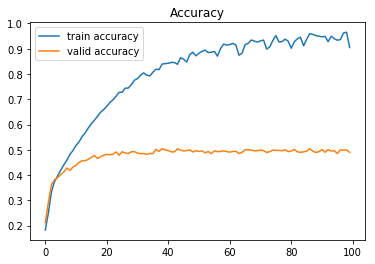

In [11]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()